## Modeling and Verification

### Import library and Load data 

In [1]:
from matplotlib import pyplot as plt

import numpy as np
import pandas as pd
import json
from scipy import stats
import seaborn as sns


from sklearn import metrics
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV, ElasticNet, ElasticNetCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import (
    train_test_split,
    cross_val_score,
    KFold,
)

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

plt.style.use('fivethirtyeight')

In [2]:
train_df = pd.read_csv("./datasets/train_clean.csv")

In [3]:
test_df = pd.read_csv("./datasets/test_clean.csv")

In [4]:
model_features_list1 = None
with open("./datasets/model_features_list1.txt") as input:
    model_features_list1= json.load(input)
model_features_list1

['house_age',
 'remod_period',
 'garage_age',
 'Cat_exterior2',
 'Ord_bsmt_exposure',
 'Cat_masvnrtype',
 'BsmtFin SF 1',
 'Ord_heatingQC',
 'Fireplaces',
 'Cat_garagetype',
 'Mas Vnr Area',
 'TotRms AbvGrd',
 'Cat_foundation',
 'Full Bath',
 'Ord_fireplacequ',
 'Ord_garage_finish',
 'Cat_neighborhoods_1',
 'Ord_bsmt_qual',
 'TotalBath',
 '1st Flr SF',
 'Garage Area',
 'Total Bsmt SF',
 'Ord_kitchen_qual',
 'Ord_exter_qual',
 'AllFlrSF',
 'Overall Qual',
 'AllSF']

In [5]:
num_sublist1 = None
with open("./datasets/num_sublist1.txt") as input:
    num_sublist1 = json.load(input)
num_sublist1

['house_age',
 'remod_period',
 'garage_age',
 'Ord_bsmt_exposure',
 'BsmtFin SF 1',
 'Ord_heatingQC',
 'Fireplaces',
 'Mas Vnr Area',
 'TotRms AbvGrd',
 'Full Bath',
 'Ord_fireplacequ',
 'Ord_garage_finish',
 'Ord_bsmt_qual',
 'TotalBath',
 '1st Flr SF',
 'Garage Area',
 'Total Bsmt SF',
 'Ord_kitchen_qual',
 'Ord_exter_qual',
 'AllFlrSF',
 'Overall Qual',
 'AllSF']

In [6]:
cat_sublist = None
with open("./datasets/cat_sublist1.txt") as input:
    cat_sublist = json.load(input)
cat_sublist

['Cat_exterior2',
 'Cat_masvnrtype',
 'Cat_garagetype',
 'Cat_foundation',
 'Cat_neighborhoods_1']

### Functions for model score

In [7]:
def display_scores(model, X_train, y_train, X_test, y_test):
    
    rmse_train = round((-cross_val_score(
        model, 
        X_train, 
        y_train, 
        scoring = 'neg_mean_squared_error', 
        cv=10).mean())**0.5, 4)
                 
    rmse_test = round((-cross_val_score(
        model, 
        X_test, 
        y_test, 
        scoring = 'neg_mean_squared_error', 
        cv=10).mean())**0.5, 4)
    
    r2_train = round(model.score(X_train, y_train), 4)
    r2_test = round(model.score(X_test, y_test), 4)
                
    print(f'The rmse mean cross validation score of train data for this model is {rmse_train}.')
    print(f'The rmse mean cross validation score of test data for this model is {rmse_test}.')
    print(f'The r2 score of train set for this model is {r2_train}.')
    print(f'The r2 score of test set for this model is {r2_test}.')

### Model verification 

#### Define X and y and train/test/split

In [8]:
X = train_df[model_features_list1]
y = train_df['SalePrice']

In [9]:
X.shape

(2047, 27)

In [10]:
# train/test/split

X_train, X_holdout, y_train, y_holdout = train_test_split(
    X, 
    y,
    random_state = 42,
    test_size=0.3
)

####  Data scaling with Standard scaler

In [11]:
# Scale your data.
ss_X = StandardScaler()

X_train_sc_num = ss_X.fit_transform(X_train[num_sublist1])
X_holdout_sc_num = ss_X.transform(X_holdout[num_sublist1])
X_sc_num = ss_X.transform(X[num_sublist1])

In [12]:
X_train_sc_combine = pd.concat(
    [pd.DataFrame(X_train_sc_num, columns = num_sublist1), 
     X_train[cat_sublist].reset_index(drop = True)], 
    axis = 1
)

X_holdout_sc_combine = pd.concat(
    [pd.DataFrame(X_holdout_sc_num, columns = num_sublist1), 
     X_holdout[cat_sublist].reset_index(drop = True)], 
    axis = 1
)

X_sc_combine = pd.concat(
    [pd.DataFrame(X_sc_num, columns = num_sublist1), 
     X[cat_sublist].reset_index(drop = True)], 
    axis = 1
)

#### Baseline with Linear regression

In [13]:
lr = LinearRegression()
lr.fit(X_train, y_train)
display_scores(lr, X_train, y_train, X_holdout, y_holdout)

The rmse mean cross validation score of train data for this model is 27255.4138.
The rmse mean cross validation score of test data for this model is 28050.6253.
The r2 score of train set for this model is 0.889.
The r2 score of test set for this model is 0.8752.


#### Ridge regression 

In [14]:
# 2. redge regression 
r_alphas = np.logspace(0,5,200)
ridge_model = RidgeCV(alphas = r_alphas, store_cv_values = True)
ridge_model.fit(X_train_sc_combine, y_train)
display_scores(ridge_model, X_train_sc_combine, y_train, X_holdout_sc_combine, y_holdout)

The rmse mean cross validation score of train data for this model is 27221.1833.
The rmse mean cross validation score of test data for this model is 27992.7968.
The r2 score of train set for this model is 0.8889.
The r2 score of test set for this model is 0.8753.


#### Lasso regression 

In [15]:
# 3 Lasso
lasso_model = LassoCV(n_alphas = 200, cv=10)
lasso_model.fit(X_train_sc_combine, y_train)
display_scores(lasso_model, X_train_sc_combine, y_train, X_holdout_sc_combine, y_holdout)

The rmse mean cross validation score of train data for this model is 27207.6141.
The rmse mean cross validation score of test data for this model is 27975.5524.
The r2 score of train set for this model is 0.8889.
The r2 score of test set for this model is 0.8749.


###### Check with any feature's lasso coef as 0

In [16]:
lasso_coef = pd.DataFrame(lasso_model.coef_, X_train_sc_combine.columns, columns = ['Coefficient'])
pd.set_option('display.max_rows', None)

In [17]:
lasso_coef[lasso_coef['Coefficient'] == 0]

,Coefficient
Total Bsmt SF,0.0


#### Elesctic regression 

In [18]:
# 4 ElescticNetCV
elas_model = ElasticNetCV(l1_ratio = [.1, .5, .7, .9, .95, .99, 1], n_alphas = 200, cv=10) 

elas_model.fit(X_train_sc_combine, y_train)
display_scores(elas_model, X_train_sc_combine, y_train, X_holdout_sc_combine, y_holdout)

The rmse mean cross validation score of train data for this model is 27207.6141.
The rmse mean cross validation score of test data for this model is 27975.5524.
The r2 score of train set for this model is 0.8889.
The r2 score of test set for this model is 0.8749.


In [19]:
elstic_model_best = ElasticNet(alpha = elas_model.alpha_, l1_ratio = elas_model.l1_ratio_)
elstic_model_best.fit(X_train_sc_combine, y_train)

ElasticNet(alpha=111.72474496846658, l1_ratio=1.0)

In [20]:
y_preds_holdout = elstic_model_best.predict(X_holdout_sc_combine)

C:\Users\User\.conda\envs\dsi\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


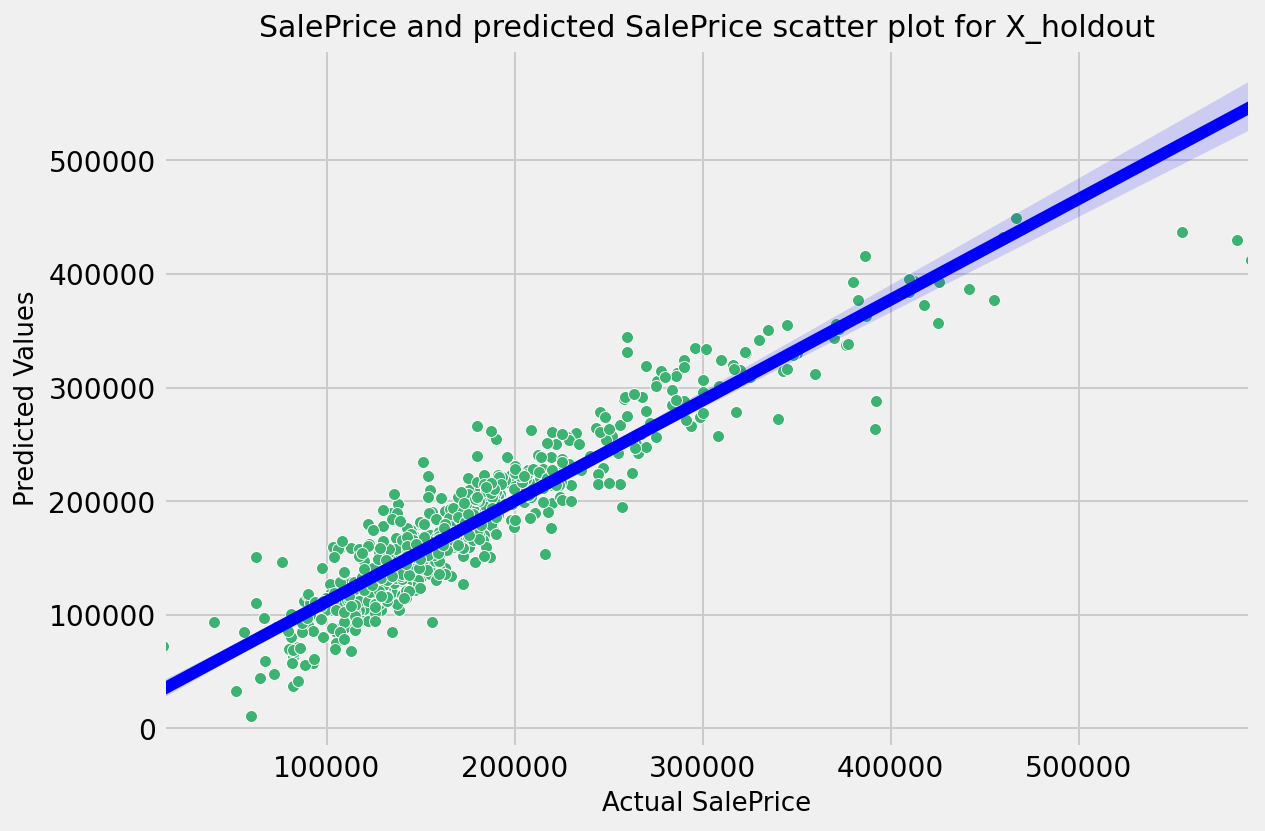

In [21]:
plt.figure(figsize=(9,6))
sns.scatterplot(x = y_holdout, y = y_preds_holdout, color = 'mediumseagreen')
sns.regplot(y_holdout, y_preds_holdout, scatter=False, color = 'blue')
plt.title('SalePrice and predicted SalePrice scatter plot for X_holdout', fontdict = {'fontsize':15})
plt.xlabel('Actual SalePrice', fontdict = {'fontsize':13})
plt.ylabel('Predicted Values', fontdict = {'fontsize':13})
plt.tight_layout();

In [22]:
y_preds_full = elstic_model_best.predict(X_sc_combine)

C:\Users\User\.conda\envs\dsi\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


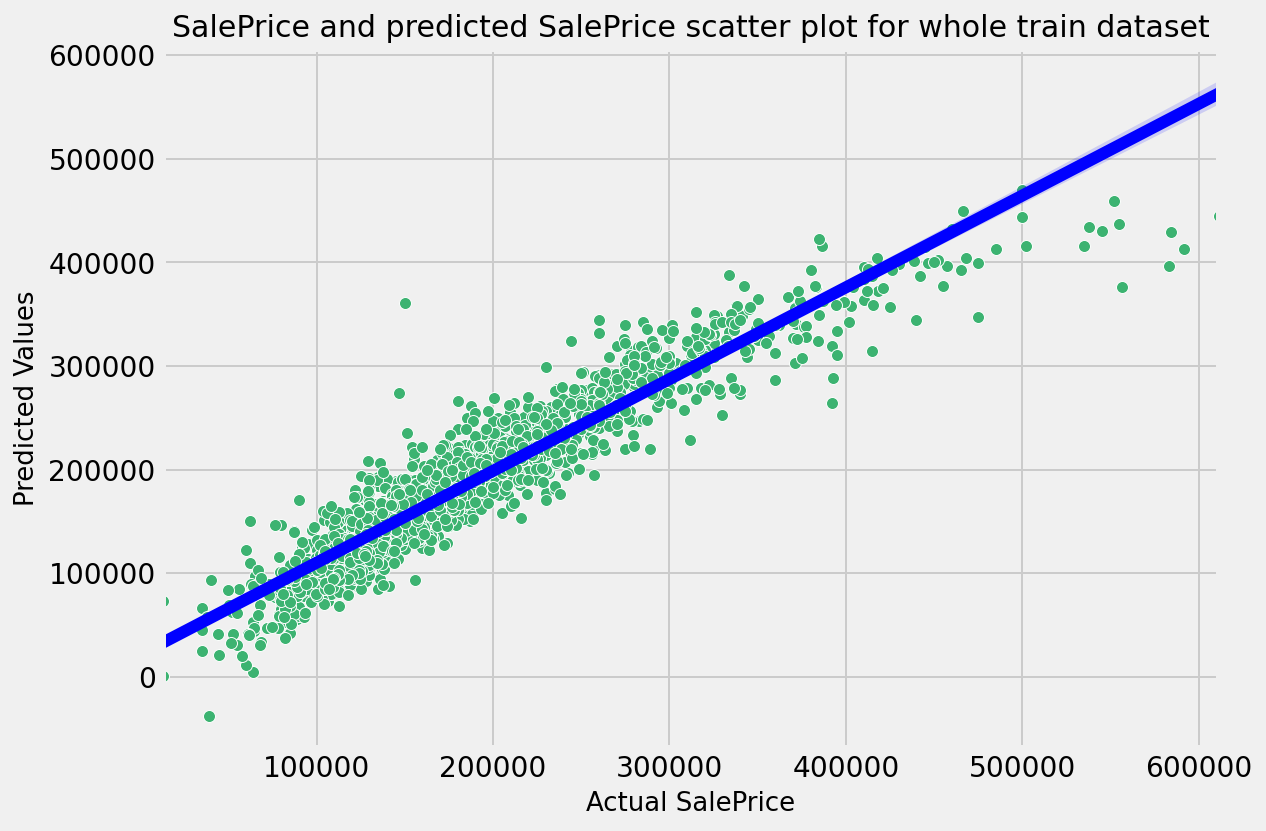

In [23]:
plt.figure(figsize=(9,6))
sns.scatterplot(x = y, y = y_preds_full, color = 'mediumseagreen')
sns.regplot(y, y_preds_full, scatter=False, color = 'blue')
plt.title('SalePrice and predicted SalePrice scatter plot for whole train dataset', fontdict = {'fontsize':15})
plt.xlabel('Actual SalePrice', fontdict = {'fontsize':13})
plt.ylabel('Predicted Values', fontdict = {'fontsize':13})
plt.tight_layout();

#### First round modeling summery and observation:

In summery, comapring to baseline (linear regresion), ridge regression, lasso regression and elasticNET regression performance much better. Amongst these three, elasticNET has best MSE score. However, we observe that with high sale price, the best fit of line does not fit well. In the high sale price side, the line tends to be curly. 
We will add square value (power 2) for some features which have high correction with saleprice to observe whether can improve MSE score or best fit of line the the following part. 

### Further Model verification by adding square value for some feature

In this part, we will add square value for Ordinal_Exter_Qual/AllFlrSF/Overall Qual/AllSF/Ordinal_Kitchen_Qual. 
At the same time, we will drop the feature whose coeffient is zero in previous lasso regression, i.e. Total Bsmt SF. 

In [24]:
# Add power 2 features

train_df['Ord_exter_qual_s2'] = train_df['Ord_exter_qual']**2
train_df['AllFlrSF_s2'] = train_df['AllFlrSF']**2
train_df['Overall Qual_s2'] = train_df['Overall Qual']**2
train_df['AllSF_s2'] = train_df['AllSF']**2
train_df['Ord_kitchen_qual_s2'] = train_df['Ord_kitchen_qual']**2
train_df['Garage_Area_s2'] = train_df['Garage Area']**2

test_df['Ord_exter_qual_s2'] = test_df['Ord_exter_qual']**2
test_df['AllFlrSF_s2'] = test_df['AllFlrSF']**2
test_df['Overall Qual_s2'] = test_df['Overall Qual']**2
test_df['AllSF_s2'] = test_df['AllSF']**2
test_df['Ord_kitchen_qual_s2'] = test_df['Ord_kitchen_qual']**2
test_df['Garage_Area_s2'] = test_df['Garage Area']**2

In [25]:
s2_list = ['Ord_exter_qual_s2', 'AllFlrSF_s2', 'Overall Qual_s2', 'AllSF_s2', 'Ord_kitchen_qual_s2', 'Garage_Area_s2']

# Add power 2 list (s2_list) to features list for the model 
model_features_list2 = model_features_list1 + s2_list

# remove zero coeffient feature in lasso regression 
model_features_list2.remove('Total Bsmt SF')

#  power 2 list (s2_list) to features list for num_sublist which will be used in standard scaler
num_sublist2 = num_sublist1 + s2_list

# remove zero coeffient feature in lasso regression 
num_sublist2.remove('Total Bsmt SF')

#### Define X and y and train/test/split

In [26]:
X = train_df[model_features_list2]
y = train_df['SalePrice']

In [27]:
# train/test/split

X_train, X_holdout, y_train, y_holdout = train_test_split(
    X, 
    y,
    random_state = 42,
    test_size=0.3
)

#### Data scaling with standarc scaler

In [28]:
# Scale your data.

ss_X = StandardScaler()

Xs2_train_sc_num = ss_X.fit_transform(X_train[num_sublist2])
Xs2_holdout_sc_num = ss_X.transform(X_holdout[num_sublist2])
Xs2_sc_num = ss_X.transform(X[num_sublist2])

In [29]:
Xs2_train_sc_combine = pd.concat(
    [pd.DataFrame(Xs2_train_sc_num, columns = num_sublist2), 
     X_train[cat_sublist].reset_index(drop = True)], 
    axis = 1
)

Xs2_holdout_sc_combine = pd.concat(
    [pd.DataFrame(Xs2_holdout_sc_num, columns = num_sublist2), 
     X_holdout[cat_sublist].reset_index(drop = True)], 
    axis = 1
)

Xs2_sc_combine = pd.concat(
    [pd.DataFrame(Xs2_sc_num, columns = num_sublist2), 
     X[cat_sublist].reset_index(drop = True)], 
    axis = 1
)

#### Linear Regression with sqaure (power 2)

In [30]:
# 1. Linear regression 
lr = LinearRegression()
lr.fit(X_train, y_train)
display_scores(lr, X_train, y_train, X_holdout, y_holdout)

The rmse mean cross validation score of train data for this model is 24795.9652.
The rmse mean cross validation score of test data for this model is 25637.2296.
The r2 score of train set for this model is 0.9103.
The r2 score of test set for this model is 0.899.


#### Ridge regression with with sqaure (power 2)

In [31]:
# 2. ridge regression 
r_alphas = np.logspace(0,5,200)
ridge_model = RidgeCV(alphas = r_alphas, store_cv_values = True)
ridge_model.fit(Xs2_train_sc_combine, y_train)
display_scores(ridge_model, Xs2_train_sc_combine, y_train, Xs2_holdout_sc_combine, y_holdout)

The rmse mean cross validation score of train data for this model is 24761.1563.
The rmse mean cross validation score of test data for this model is 25348.8987.
The r2 score of train set for this model is 0.9101.
The r2 score of test set for this model is 0.899.


In [32]:
# define ridge with optimal alpha when use train data 

ridge_model_best = Ridge(alpha = ridge_model.alpha_)
ridge_model_best.fit(Xs2_train_sc_combine, y_train)

Ridge(alpha=3.0018358135755894)

In [33]:
y_preds_ridge_holdout = ridge_model_best.predict(Xs2_holdout_sc_combine)

C:\Users\User\.conda\envs\dsi\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


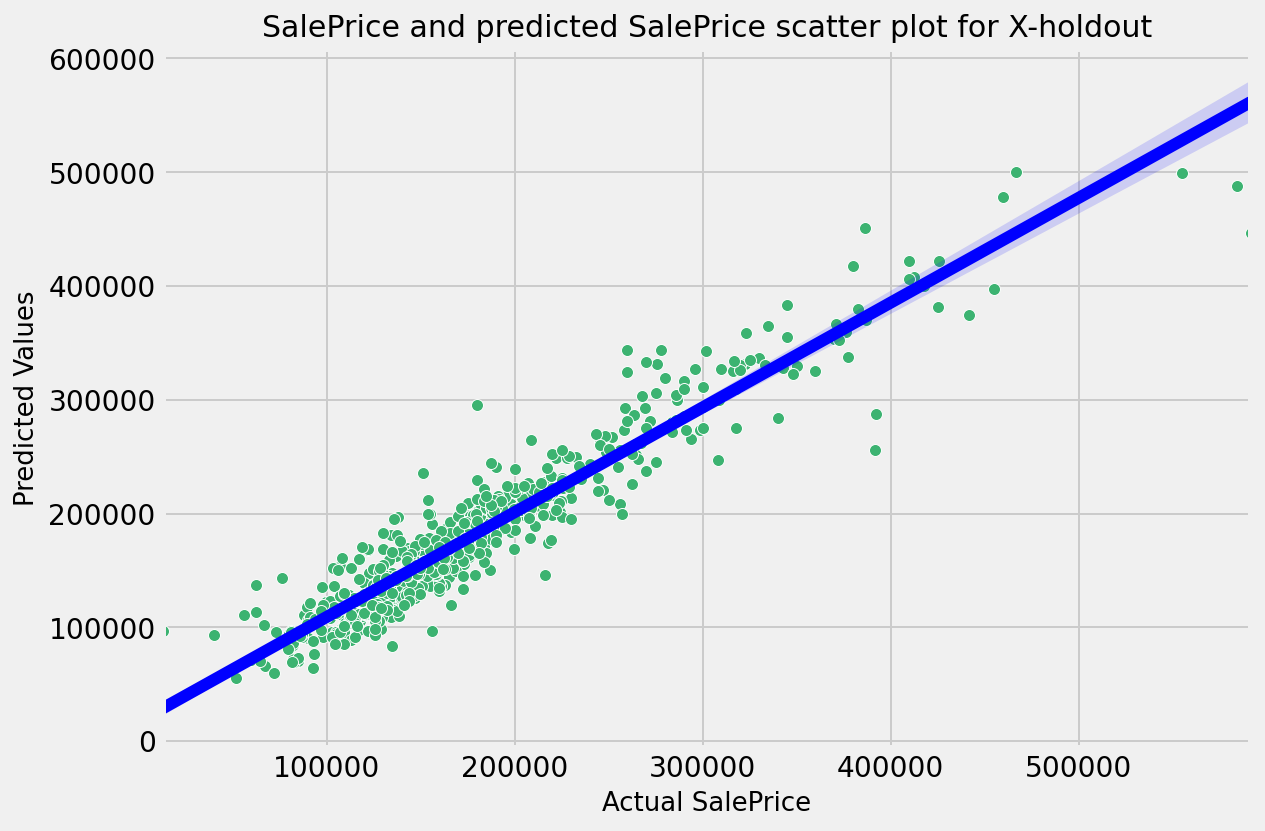

In [34]:
plt.figure(figsize=(9,6))
sns.scatterplot(x = y_holdout, y = y_preds_ridge_holdout, color = 'mediumseagreen')
sns.regplot(y_holdout, y_preds_ridge_holdout, scatter=False, color = 'blue')
plt.title('SalePrice and predicted SalePrice scatter plot for X-holdout', fontdict = {'fontsize':15})
plt.xlabel('Actual SalePrice', fontdict = {'fontsize':13})
plt.ylabel('Predicted Values', fontdict = {'fontsize':13})
plt.tight_layout();

In [35]:
y_preds_ridge_full = ridge_model_best.predict(Xs2_sc_combine)

C:\Users\User\.conda\envs\dsi\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


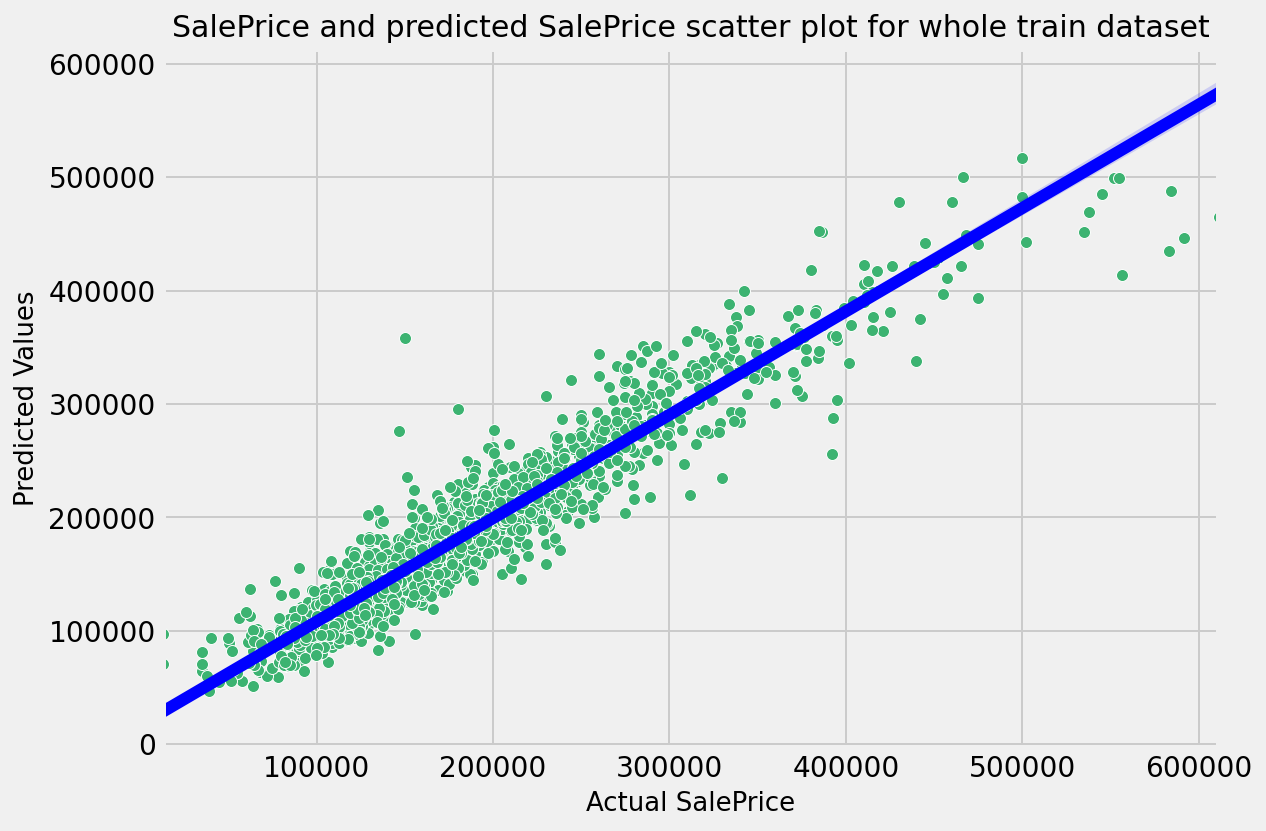

In [36]:
plt.figure(figsize=(9,6))
sns.scatterplot(x = y, y = y_preds_ridge_full, color = 'mediumseagreen')
sns.regplot(y, y_preds_ridge_full, scatter=False, color = 'blue')
plt.title('SalePrice and predicted SalePrice scatter plot for whole train dataset', fontdict = {'fontsize':15})
plt.xlabel('Actual SalePrice', fontdict = {'fontsize':13})
plt.ylabel('Predicted Values', fontdict = {'fontsize':13})
plt.tight_layout();

#### Lasso regression with square (power 2)

In [37]:
# Lasso
lasso_model = LassoCV(n_alphas = 200, cv=10)
lasso_model.fit(Xs2_train_sc_combine, y_train)
display_scores(lasso_model, Xs2_train_sc_combine, y_train, Xs2_holdout_sc_combine, y_holdout)

The rmse mean cross validation score of train data for this model is 24809.6161.
The rmse mean cross validation score of test data for this model is 25616.3006.
The r2 score of train set for this model is 0.9097.
The r2 score of test set for this model is 0.898.


In [38]:
lasso_coef = pd.DataFrame(lasso_model.coef_, Xs2_train_sc_combine.columns, columns = ['Coefficient'])
pd.set_option('display.max_rows', None)

In [39]:
lasso_coef[lasso_coef['Coefficient'] == 0]

,Coefficient


#### ElescticNetCV with square (power 2)

In [40]:
# ElescticNetCV
elas_model = ElasticNetCV(n_alphas = 200, l1_ratio = [.1, .5, .7, .9, .95, .99, 1], cv=10)
elas_model.fit(Xs2_train_sc_combine, y_train)
display_scores(elas_model, Xs2_train_sc_combine, y_train, Xs2_holdout_sc_combine, y_holdout)

The rmse mean cross validation score of train data for this model is 24809.6161.
The rmse mean cross validation score of test data for this model is 25616.3006.
The r2 score of train set for this model is 0.9097.
The r2 score of test set for this model is 0.898.


#### Second round modeling summery and observation:

In summery, comapring to the first round veification, both MSE score and R2 score have significant improvement. The best fit of line for higher Sale Price also improved. 

We will continue to add power 3 for some features to evaluate whether higher power values can improve MSE and bstt fit of line further. 

### Further model evaluation add power 3 

#### Add power 3 features

In [41]:
train_df['Ord_exter_qual_s3'] = train_df['Ord_exter_qual']**3
train_df['AllFlrSF_s3'] = train_df['AllFlrSF']**3
train_df['Overall_Qual_s3'] = train_df['Overall Qual']**3
train_df['AllSF_s3'] = train_df['AllSF']**3
train_df['Ord_kitchen_qual_s3'] = train_df['Ord_kitchen_qual']**3
train_df['Garage_Area_s3'] = train_df['Garage Area']**3

test_df['Ord_exter_qual_s3'] = test_df['Ord_exter_qual']**3
test_df['AllFlrSF_s3'] = test_df['AllFlrSF']**3
test_df['Overall_Qual_s3'] = test_df['Overall Qual']**3
test_df['AllSF_s3'] = test_df['AllSF']**3
test_df['Ord_kitchen_qual_s3'] = test_df['Ord_kitchen_qual']**3
test_df['Garage_Area_s3'] = test_df['Garage Area']**3

In [42]:
s3_list = ['Ord_exter_qual_s3', 'AllFlrSF_s3', 'Overall_Qual_s3', 'AllSF_s3', 'Ord_kitchen_qual_s3', 'Garage_Area_s3']

In [43]:
# Add power 3 features list into model feature list
model_features_list3 = model_features_list2 + s3_list

In [44]:
# Add power 3 features list into model feature list
num_sublist3 = num_sublist2 + s3_list

#### Define X and y and train/test/split

In [45]:
# 1 Original X 
X = train_df[model_features_list3]
y = train_df['SalePrice']

In [46]:
X.shape

(2047, 38)

In [47]:
# train/test/split

X_train, X_holdout, y_train, y_holdout = train_test_split(
    X, 
    y,
    random_state = 42,
    test_size=0.3
)

####  Data scaling with Standard scaler

In [48]:
ss_X = StandardScaler()

Xs3_train_sc_num = ss_X.fit_transform(X_train[num_sublist3])
Xs3_holdout_sc_num = ss_X.transform(X_holdout[num_sublist3])
Xs3_sc_num = ss_X.transform(X[num_sublist3])

In [49]:
Xs3_train_sc_combine = pd.concat(
    [pd.DataFrame(Xs3_train_sc_num, columns = num_sublist3), 
     X_train[cat_sublist].reset_index(drop = True)], 
    axis = 1
)

Xs3_holdout_sc_combine = pd.concat(
    [pd.DataFrame(Xs3_holdout_sc_num, columns = num_sublist3), 
     X_holdout[cat_sublist].reset_index(drop = True)], 
    axis = 1
)

# input for entire train dataset
Xs3_sc_combine = pd.concat(
    [pd.DataFrame(Xs3_sc_num, columns = num_sublist3), 
     X[cat_sublist].reset_index(drop = True)], 
    axis = 1
)

#### Linear Regression with sqaure (power 3)

In [50]:
# 1. Linear regression 
lr = LinearRegression()
lr.fit(X_train, y_train)
display_scores(lr, X_train, y_train, X_holdout, y_holdout)

The rmse mean cross validation score of train data for this model is 24687.4268.
The rmse mean cross validation score of test data for this model is 26424.0999.
The r2 score of train set for this model is 0.9135.
The r2 score of test set for this model is 0.9028.


#### Ridge regression with with sqaure (power 3)

In [51]:
# 2. ridge regression 
r_alphas = np.logspace(0,5,200)
ridge_model = RidgeCV(alphas = r_alphas, store_cv_values = True)
ridge_model.fit(Xs3_train_sc_combine, y_train)
display_scores(ridge_model, Xs3_train_sc_combine, y_train, Xs3_holdout_sc_combine, y_holdout)

The rmse mean cross validation score of train data for this model is 24693.2033.
The rmse mean cross validation score of test data for this model is 25030.6911.
The r2 score of train set for this model is 0.9111.
The r2 score of test set for this model is 0.901.


#### Lasso regression with square (power 3)

In [52]:
lasso_model = LassoCV(n_alphas = 200, cv=10)
lasso_model.fit(Xs3_train_sc_combine, y_train)
display_scores(lasso_model, Xs3_train_sc_combine, y_train, Xs3_holdout_sc_combine, y_holdout)

C:\Users\User\.conda\envs\dsi\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 980993826.4570312, tolerance: 809197081.6871653
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\.conda\envs\dsi\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 872828560.7606201, tolerance: 824306845.4734358
  model = cd_fast.enet_coordinate_descent(


The rmse mean cross validation score of train data for this model is 24651.7675.
The rmse mean cross validation score of test data for this model is 25326.342.
The r2 score of train set for this model is 0.9111.
The r2 score of test set for this model is 0.9006.


In [53]:
lasso_coef = pd.DataFrame(lasso_model.coef_, Xs3_train_sc_combine.columns, columns = ['Coefficient'])
pd.set_option('display.max_rows', None)

In [54]:
lasso_coef[lasso_coef['Coefficient'] == 0]

,Coefficient
Overall Qual,0.0
AllSF,0.0
Ord_exter_qual_s2,-0.0
Overall Qual_s2,-0.0
AllSF_s2,0.0
Ord_kitchen_qual_s2,-0.0
AllFlrSF_s3,0.0
Garage_Area_s3,0.0
Cat_exterior2,-0.0


#### ElescticNetCV with square (power 3)

In [55]:
# ElescticNetCV
elas_model = ElasticNetCV(n_alphas = 200, l1_ratio = [.1, .5, .7, .9, .95, .99, 1], cv=10)
elas_model.fit(Xs3_train_sc_combine, y_train)
display_scores(elas_model, Xs3_train_sc_combine, y_train, Xs3_holdout_sc_combine, y_holdout)

C:\Users\User\.conda\envs\dsi\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 980993826.4570312, tolerance: 809197081.6871653
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\.conda\envs\dsi\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 872828560.7606201, tolerance: 824306845.4734358
  model = cd_fast.enet_coordinate_descent(


The rmse mean cross validation score of train data for this model is 24651.7675.
The rmse mean cross validation score of test data for this model is 25326.342.
The r2 score of train set for this model is 0.9111.
The r2 score of test set for this model is 0.9006.


#### Third round modeling summery and observation:

Comparing with second round verification, adding power 3 features can not improve MSE or best fit of line a lot. 
We also observe quite some features with zero coeffient in lasso regression. This may be caused by high colineanrity between features with its power 2/power 3 features. Furthermore, if we add higher power features may case high variance and model may not performance well as we expected. 

In the fourth round of verification, we will drop these features with zero coeffient in lasso regression. 

### Further model evaluation to drop zero coeffient features in lasso regression

#### Remove features with zero coeffient in lasso regression 

In [56]:
drop_list = ['cat_exterior2', 'Garage_Area_s3', 'AllFlrSF_s3', 'Overall Qual', 'Ord_kitchen_qual_s2', 'AllSF_s2', 'Overall Qual_s2', 'Ord_exter_qual_s2', 'AllSF']

In [60]:
model_features_list4 = [x for x in model_features_list3 if x not in drop_list]
num_sublist4 = [x for x in num_sublist3 if x not in drop_list]
cat_sublist4 = [x for x in cat_sublist if x not in drop_list]
cat_sublist1 = [x for x in cat_sublist if x not in drop_list]

#### Define X, y and train/test/split

In [61]:
X = train_df[model_features_list4]
y = train_df['SalePrice']

# define X for test set in which we need to predict SalePrice
X_test = test_df[model_features_list4]

In [62]:
# train/test/split

X_train, X_holdout, y_train, y_holdout = train_test_split(
    X, 
    y,
    random_state = 42,
    test_size=0.3
)

####  Data scaling with Standard scaler

In [63]:
ss_X = StandardScaler()

Xs3_train_sc_num = ss_X.fit_transform(X_train[num_sublist4])
Xs3_holdout_sc_num = ss_X.transform(X_holdout[num_sublist4])
Xs3_sc_num = ss_X.transform(X[num_sublist4])

# scale for test dataset input X_test
X_test_sc_num = ss_X.transform(X_test[num_sublist4])

In [64]:
Xs3_train_sc_combine = pd.concat(
    [pd.DataFrame(Xs3_train_sc_num, columns = num_sublist4), 
     X_train[cat_sublist1].reset_index(drop = True)], 
    axis = 1
)

Xs3_holdout_sc_combine = pd.concat(
    [pd.DataFrame(Xs3_holdout_sc_num, columns = num_sublist4), 
     X_holdout[cat_sublist1].reset_index(drop = True)], 
    axis = 1
)

# input for entire train dataset
Xs3_sc_combine = pd.concat(
    [pd.DataFrame(Xs3_sc_num, columns = num_sublist4), 
     X[cat_sublist1].reset_index(drop = True)], 
    axis = 1
)

# input for entire train dataset
X_test_sc_combine = pd.concat(
    [pd.DataFrame(X_test_sc_num, columns = num_sublist4), 
     X_test[cat_sublist1].reset_index(drop = True)], 
    axis = 1
)

#### Linear Regression after drop zero coeffient features in lasso regression

In [65]:
# 1. Linear regression 
lr = LinearRegression()
lr.fit(X_train, y_train)

display_scores(lr, X_train, y_train, X_holdout, y_holdout)

The rmse mean cross validation score of train data for this model is 24593.4239.
The rmse mean cross validation score of test data for this model is 25173.907.
The r2 score of train set for this model is 0.9115.
The r2 score of test set for this model is 0.901.


#### Ridge regression after drop zero coeffient features in lasso regression

In [66]:
# 2. ridge regression 
r_alphas = np.logspace(0,5,200)
ridge_model = RidgeCV(alphas = r_alphas, store_cv_values = True)
ridge_model.fit(Xs3_train_sc_combine, y_train)

display_scores(ridge_model, Xs3_train_sc_combine, y_train, Xs3_holdout_sc_combine, y_holdout)

The rmse mean cross validation score of train data for this model is 24546.7903.
The rmse mean cross validation score of test data for this model is 24833.6543.
The r2 score of train set for this model is 0.9112.
The r2 score of test set for this model is 0.9011.


#### Lasso regression after drop zero coeffient features in lasso regression

In [67]:
lasso_model = LassoCV(n_alphas = 200, cv=10)
lasso_model.fit(Xs3_train_sc_combine, y_train)
display_scores(lasso_model, Xs3_train_sc_combine, y_train, Xs3_holdout_sc_combine, y_holdout)

The rmse mean cross validation score of train data for this model is 24600.699.
The rmse mean cross validation score of test data for this model is 25063.6965.
The r2 score of train set for this model is 0.9114.
The r2 score of test set for this model is 0.9009.


In [68]:
lasso_coef = pd.DataFrame(lasso_model.coef_, Xs3_train_sc_combine.columns, columns = ['Coefficient'])
pd.set_option('display.max_rows', None)

In [69]:
lasso_coef[lasso_coef['Coefficient'] == 0]

,Coefficient


#### ElescticNetCV with after drop zero coeffient features in lasso regression

In [614]:
elas_model = ElasticNetCV(n_alphas = 200, l1_ratio = [.1, .5, .7, .9, .95, .99, 1], cv=10)
elas_model.fit(Xs3_train_sc_combine, y_train)

display_scores(elas_model, Xs3_train_sc_combine, y_train, Xs3_holdout_sc_combine, y_holdout)

The rmse mean cross validation score of train data for this model is 24600.699.
The rmse mean cross validation score of test data for this model is 25063.6965.
The r2 score of train set for this model is 0.9114.
The r2 score of test set for this model is 0.9009.


#### Fourth round modeling summery and observation:

In the fourth verification, the MSE score almost had no improvement. However, **we can observe the small gap between train data MSE score and holdout data MSE score**. R2 score for train dataset and holdout data set were 91% and 90% respectively. We can say that this model could fit train and holdout data well. Comparing all 4 model results, **ridge regression is our best model**. We will use this model to predict SalePrice in test dataset. 

### plot predict value and residual with best model 

#### use best model to evaluation whole train dataset

In [615]:
ridge_model_best = Ridge(alpha = ridge_model.alpha_)
ridge_model_best.fit(Xs3_train_sc_combine, y_train)

Ridge(alpha=19.116440753857027)

In [616]:
# use best model to evaluation whole train dataset
mse_whole_train = round(-cross_val_score(    
    Ridge(alpha = ridge_model.alpha_), 
    Xs3_sc_combine, 
    y, 
    scoring = 'neg_mean_squared_error', 
    cv=10).mean(), 4
)

                 
r2_whole_train = round(cross_val_score(
    Ridge(alpha = ridge_model.alpha_), 
    Xs3_sc_combine, 
    y, 
    cv=10).mean(), 4
)

print(f'The mse mean cross validation score of whole train data for best model is {mse_whole_train}.')
print(f'The r2 score of whole train set for best model is {r2_whole_train}.')

The mse mean cross validation score of whole train data for best model is 593418001.2004.
The r2 score of whole train set for best model is 0.9057.


- **We can see that for whole train dataset, MSE & R2 scores still can be maintained.**

#### use best model to plot y and y_preds for whole train dataset

In [617]:
y_preds_ridge_hold= ridge_model_best.predict(Xs3_holdout_sc_combine)

C:\Users\User\.conda\envs\dsi\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


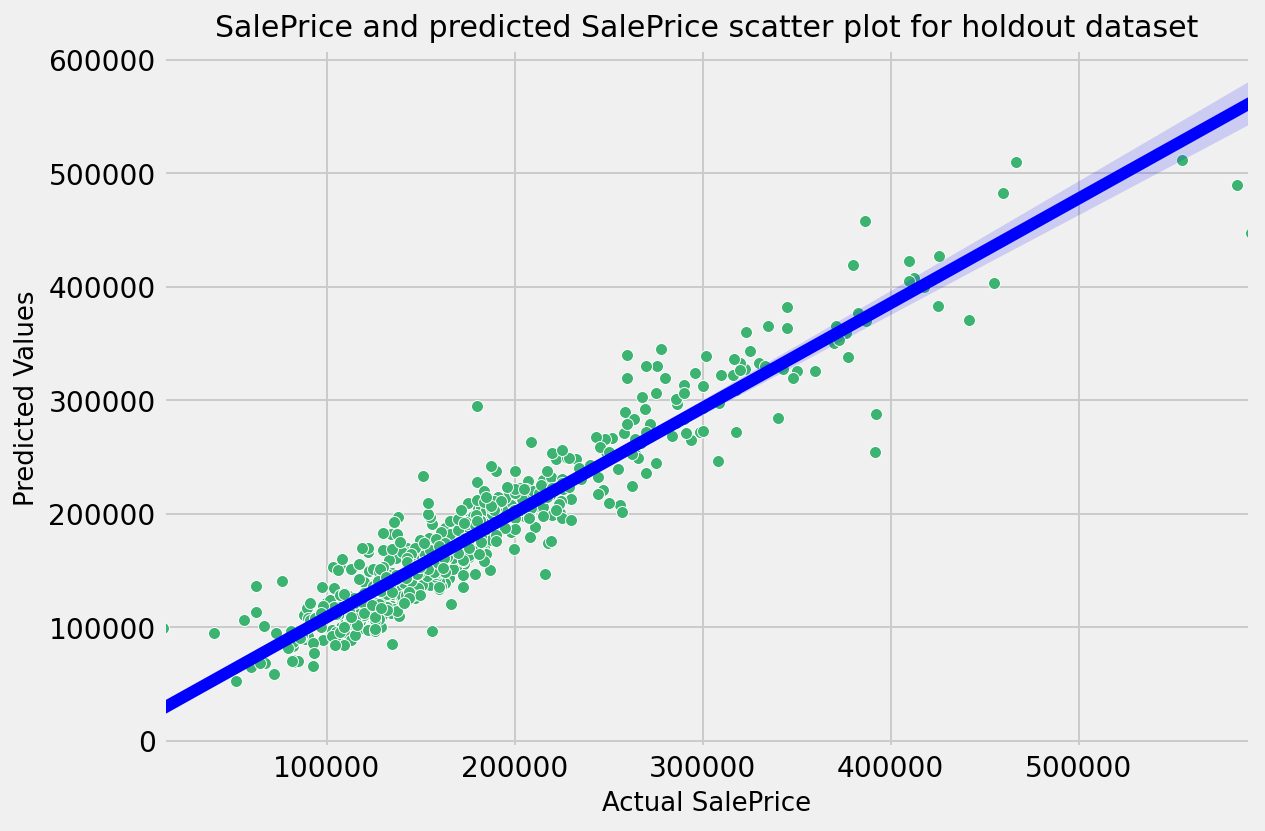

In [618]:
plt.figure(figsize=(9,6))
sns.scatterplot(x = y_holdout, y = y_preds_ridge_hold, color = 'mediumseagreen')
sns.regplot(y_holdout, y_preds_ridge_hold, scatter=False, color = 'blue')
plt.title('SalePrice and predicted SalePrice scatter plot for holdout dataset', fontdict = {'fontsize':15})
plt.xlabel('Actual SalePrice', fontdict = {'fontsize':13})
plt.ylabel('Predicted Values', fontdict = {'fontsize':13})
plt.tight_layout();

In [619]:
y_preds_ridge_full = ridge_model_best.predict(Xs3_sc_combine)

C:\Users\User\.conda\envs\dsi\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


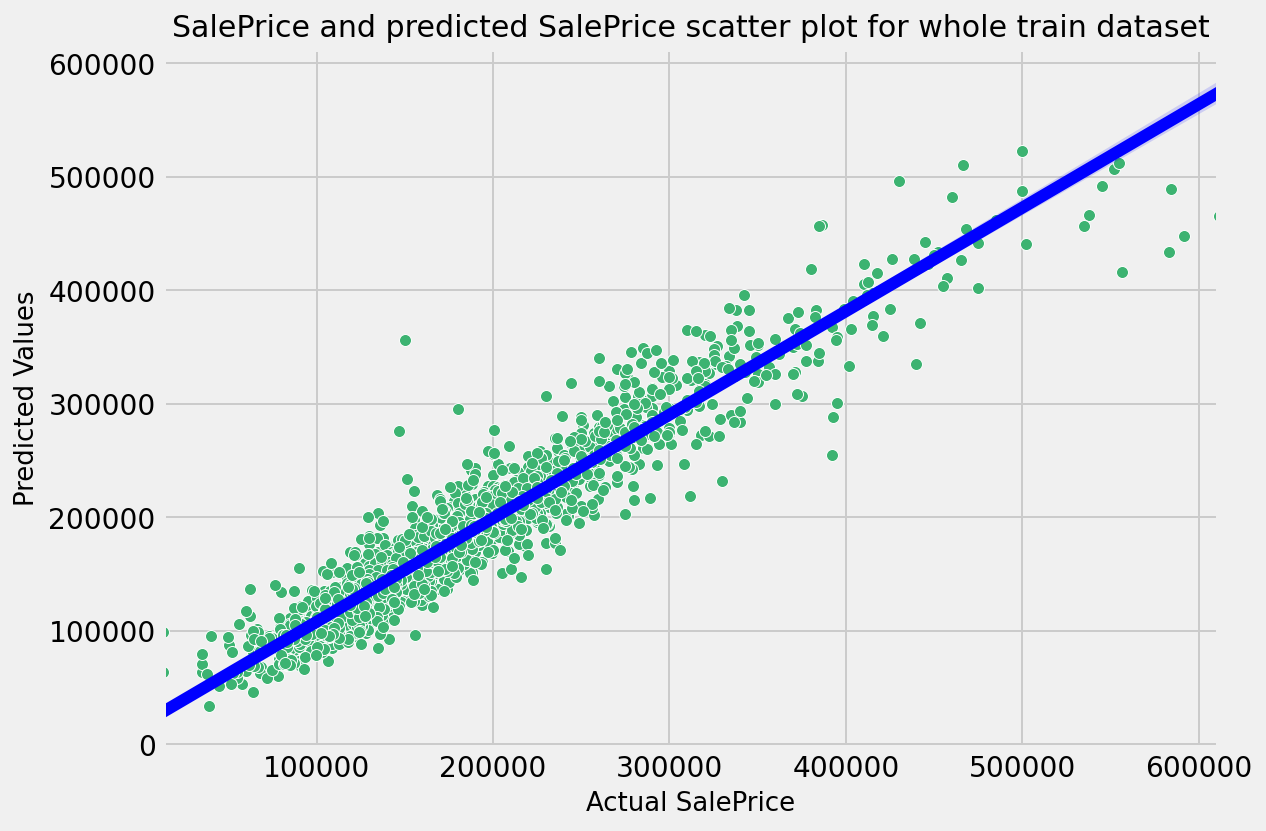

In [620]:
plt.figure(figsize=(9,6))
sns.scatterplot(x = y, y = y_preds_ridge_full, color = 'mediumseagreen')
sns.regplot(y, y_preds_ridge_full, scatter=False, color = 'blue')
plt.title('SalePrice and predicted SalePrice scatter plot for whole train dataset', fontdict = {'fontsize':15})
plt.xlabel('Actual SalePrice', fontdict = {'fontsize':13})
plt.ylabel('Predicted Values', fontdict = {'fontsize':13})
plt.tight_layout();

-  From scatter plot for y and y_preds of whole train dataset, this model can fit perfectly for Sale Price from 0 to 500000. However, this model still can not fit well for higher Sale Price which is between 500000 to 600000 although we try our best to improve it. As we observed histogram for Sale Price in data visualization, it is not normally distributed but skew towards higher Sale Price side. That may explain why we can not model a perfect line for higher Sale Price. 

#### use best model to plot y_preds and residual

In [621]:
res = y - y_preds_ridge_full

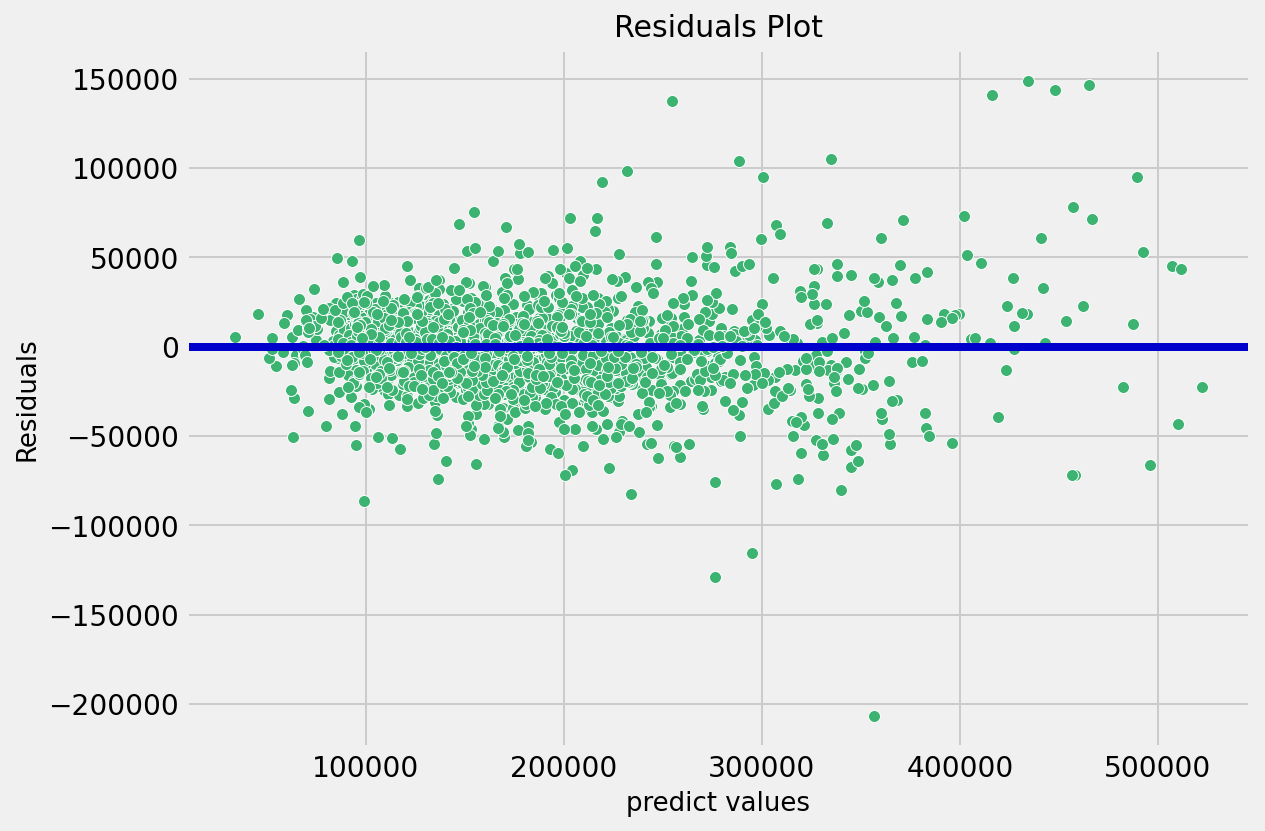

In [622]:
plt.figure(figsize=(9,6))
sns.scatterplot(x = y_preds_ridge_full, y = res, color = 'mediumseagreen')
plt.axhline(0, color = 'mediumblue')
plt.title('Residuals Plot', fontdict = {'fontsize':15})
plt.xlabel('predict values', fontdict = {'fontsize':13})
plt.ylabel('Residuals', fontdict = {'fontsize':13})
plt.tight_layout();

<Figure size 648x432 with 0 Axes>

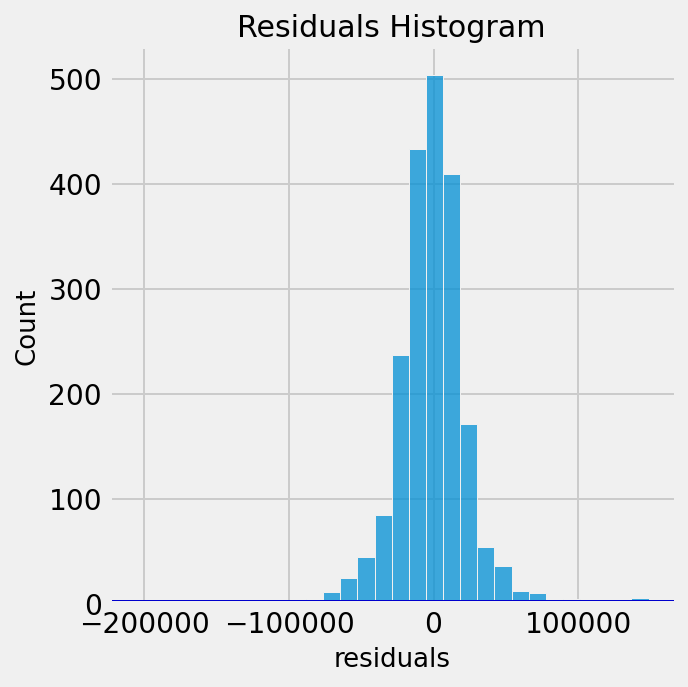

In [623]:
plt.figure(figsize=(9,6))
sns.displot(res, bins = 30)
plt.axhline(0, color = 'mediumblue')
plt.title('Residuals Histogram', fontdict = {'fontsize':15})
plt.xlabel('residuals', fontdict = {'fontsize':13})
plt.ylabel('Count', fontdict = {'fontsize':13})
plt.tight_layout();

-  The residuals are scattered around Zero while residuals while the points for higher SalePrice scatter more widely. 
The histogram shows that it is approximately a normal distribution except one oulier, which we can observe from residual scatter plot. 

#### Calculate coeffient 

In [624]:
ridge_coef = pd.DataFrame(ridge_model.coef_, Xs3_train_sc_combine.columns, columns = ['Coefficient'])
pd.set_option('display.max_rows', None)
ridge_coef.sort_values('Coefficient', ascending = False)

,Coefficient
Overall_Qual_s3,17679.291858
AllSF_s3,15108.722846
Ord_kitchen_qual_s3,13501.192647
Cat_neighborhoods_1,12665.852022
AllFlrSF_s2,8767.721114
Ord_exter_qual_s3,8510.556467
BsmtFin SF 1,7442.101522
Garage_Area_s2,5618.387350
AllFlrSF,5582.463791
Cat_garagetype,5540.183893


- These features appear to add the most value to a home, such as:                                                                
    Overall_Qual / AllSF / kitchen_qual / Cat_neighborhoods_1 / AllFlrSF / exter_qual / BsmtFin SF 1 / Garage_Area / Garage Type
    
- remod_period / house_age appear to hurt the value a home the most. It means that new house and newly renovated house will add value to the house. 


#### predict SalePrice in test dataset with best model

In [628]:
y_preds_test = ridge_model_best.predict(X_test_sc_combine)
test_df['SalePrice'] = y_preds_test
kaggle = pd.DataFrame()
kaggle['Id'] = test_df['Id']
kaggle['SalePrice'] = test_df['SalePrice']
kaggle.to_csv("./datasets/kaggle_13Jun.csv", index=False)

<img src="./image/kaggle_submission.png">

## Conclusion and Recommendations

The model created in project performances well for 90.57% of the variation in Sale Price of a property although it does not fit well for extreme high SalePrice. Power 2 features are added and this improves the prediction. However, higher power features (i.e. 3) does not help a lot to improve predictions but raises high vairance in linear regression and causes colinearity between features. After remove features with zero coeffients in lasso regression can make the model fit train dataset and holdout dataset better. Observed from histogram plots for SalePrice and some continous data features, they are not normally distributed and skew to one side. We may consider log-transfomration for further improvement of this model. 

From this model, we can make some recommendations for homeowners to increase their property value. 
  1. Maintain overall house quality including kitchen, internal and external of house etc.
  2. Increase floor area if possible 
  3. Make house well-renovated as good living quarters including basement area
  4. With builtIn or attached garage
  5. New houses and newly-renovated houses are more valuable. 
  6. The houses in neighborhoods, such as neighborhoods Stone Brook, Northridge Heights, Veenker, Northridge, Green Hills are more valuable. 

## Reference

[1] https://www.niche.com/places-to-live/ames-story-ia/                                                                 
[2] https://en.wikipedia.org/wiki/Ames,_Iowa                                                                             
[3] https://www.mortgageloan.com/are-automated-appraisals-the-wave-of-the-future#When-automated-makes-sense